<a href="https://colab.research.google.com/github/b-li111/trees/blob/main/trees_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

2. How do trees handle non-linear relationships between variables? Compare this to linear models.

3. Why is the Gini a good loss function for categorical target variables?

4. Why do trees tend to overfit, and how can this tendency be constrained?

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

1. Trees are constructed when the algorithm splits data into progressively smaller groups based on certain features (like symptoms). Each time, the algorithm picks the split point/feature that best separates the data for predictions. It continues until it reaches a stopping rule, like a minimum # of points in a group.
2. Trees handle non-linear relationships by splitting data into chunks based on certain rules (for example, height > 60 inches). They don’t assume that there’s a linear relationship between variables, while linear models do. They assume there is a linear relationship between input and output, which limits its predictive power and pattern recognition.
3. The Gini measures the “purity” of a split. If a branch has mostly one class of variable (yes vs. no), that leads to a low Gini (between 0-1), which is what we’re going for. The Gini aids the model/tree to split the groups as “purely” as possible. This is particularly useful for categorical variables (like “yes” and “no”, or  “cough” and “no cough”), because you can delineate it more clearly.
4. Trees tend to overfit because they can just continue splitting the data to the point where it’s specific to the individual dataset, not broad trends. It makes the model too particular to the specific training data. This tendency can be constrained by setting a minimum number of points/data in a split, limiting the depth of the tree, and cutting back branches that we deem not so useful (pruning), or using RandomForest.
5. False. They can perform well with both categorical and numerical variables/data. While they may handle categorical data more “naturally”, they can split numerical data into ranges, which they can then perform very well on. They have many uses.
6. Efficiency and clarity. Two-way splits are much easier to compute and keep the tree more simple. It’s also less work for the algorithm/it can be more accurate in choosing the best split if splitting into two rather than three or more. Two-way splits generally perform better, though larger splits are possible.
7. For overfitting– if the tree is very deep and has lots of very small branches, and there are only a few points in each branch, then the data is likely overfitted to the training set.
For underfitting– if the tree is not deep enough and makes overly simplistic/broad predictions.
A way to test– if the tree performs well on training data but not on test data, the model is overfitting; if it performs poorly on both, the model is likely underfitting.


**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

In [60]:
import pandas as pd
df = pd.read_csv('cars_hw.csv')
print(df.shape)
print( df.columns.tolist())
print(df.head())


(976, 12)
['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission', 'Transmission_Type', 'Price']
   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3          1st                 5    petrol      5-Speed            Manual   
4   

1. There are 976 observations (rows) and 12 variables (columns). The available variables are 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission', 'Transmission_Type', and 'Price'

In [61]:
df = pd.get_dummies(df, columns=[
    'Make', 'Color', 'Body_Type', 'No_of_Owners',
    'Fuel_Type', 'Transmission', 'Transmission_Type'
])

numeric_features = ['Mileage_Run', 'Make_Year', 'Seating_Capacity']


X = df[numeric_features + [col for col in df.columns if col.startswith((
    'Make_', 'Color_', 'Body_Type_', 'No_of_Owners_',
    'Fuel_Type_', 'Transmission_', 'Transmission_Type_'))]]


y = df['Price']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score


r2_scores = []

for leaf_size in range(1, 26):
    model = DecisionTreeRegressor(min_samples_leaf=leaf_size, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append((leaf_size, r2))

best_leaf, best_r2 = max(r2_scores, key=lambda x: x[1])

print(best_leaf)
print(best_r2)


1
0.8278119736685479


3. the model with min_samples_leaf = 1 outputted the highest r^2 score of .83. This explains about 83% of the variation in car prices.

R2: 0.7861982307621793
RMSE: 156595.32911405797


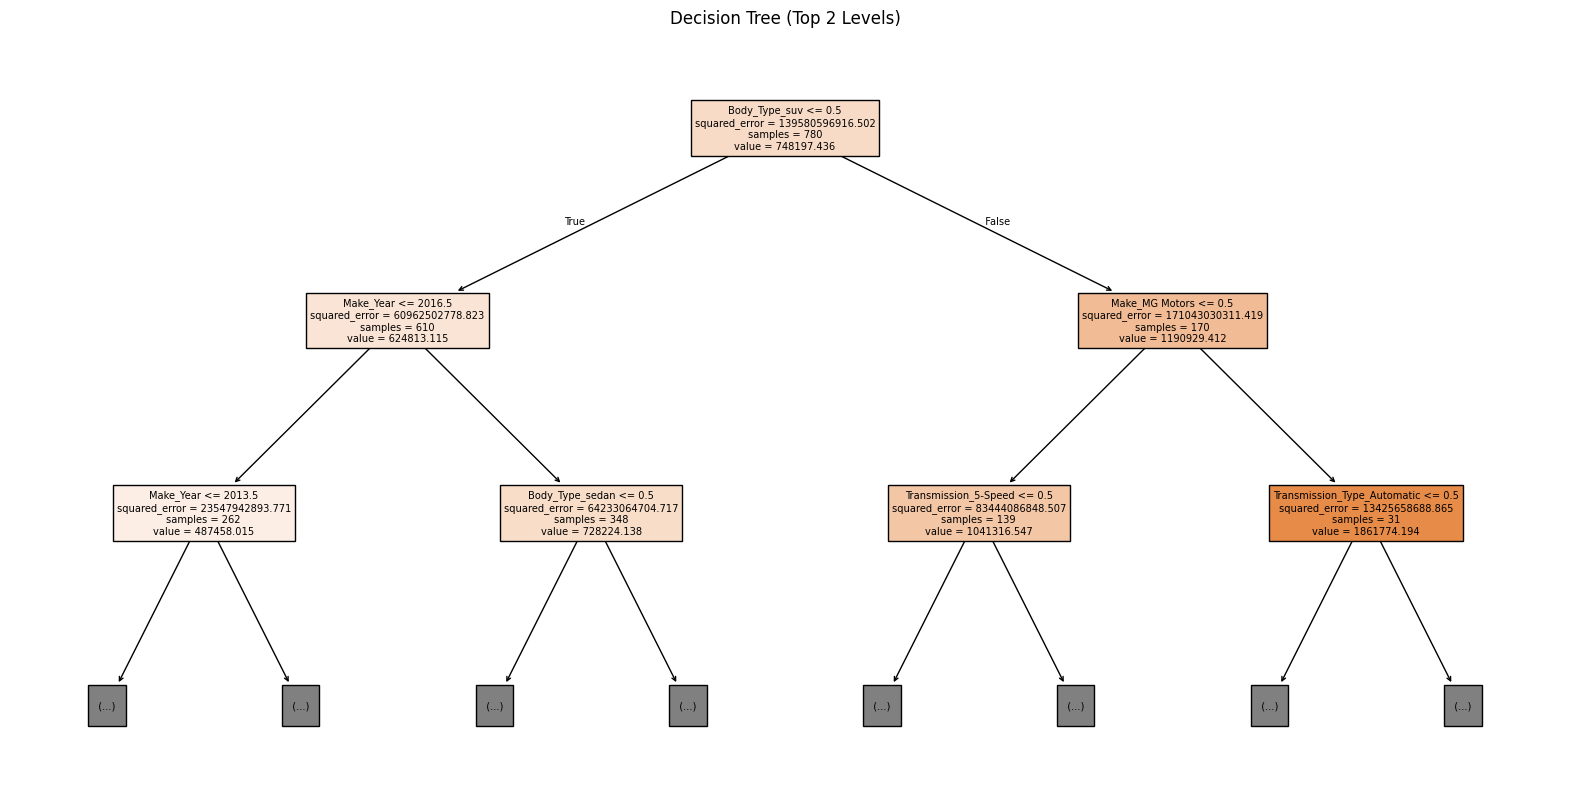

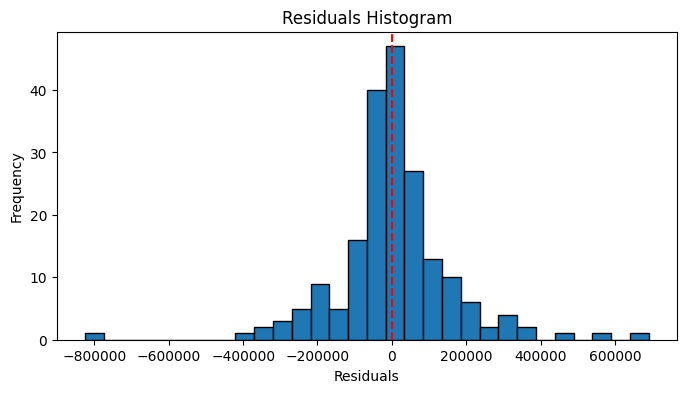

In [63]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

model = DecisionTreeRegressor(min_samples_leaf=3, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R2:", r2)
print("RMSE:", rmse)

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, max_depth=2)
plt.title("Decision Tree (Top 2 Levels)")
plt.show()


residuals = y_test - y_pred

plt.figure(figsize=(8, 4))
plt.hist(residuals, bins=30, edgecolor='black')
plt.axvline(0, color='red', linestyle='dashed')
plt.title("Residuals Histogram")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()




4. R2= 0.786, 156595.329. And the density of the residuals does seem symmetric and centered around 0, which is a good sign that the model isn't overly biased/overfitted/underfitted.


In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)


r2_lin = r2_score(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))

print("LR R2:", r2_lin)
print("LR RMSE:", rmse_lin)


LR R2: 0.8202733305970934
LR RMSE: 143575.19660662013


The linear regression performed better (r2 .82 and rmse 143575, better than the trees model). My guess is that the relationship between price and features is more or less linear, so it performed better with this model.

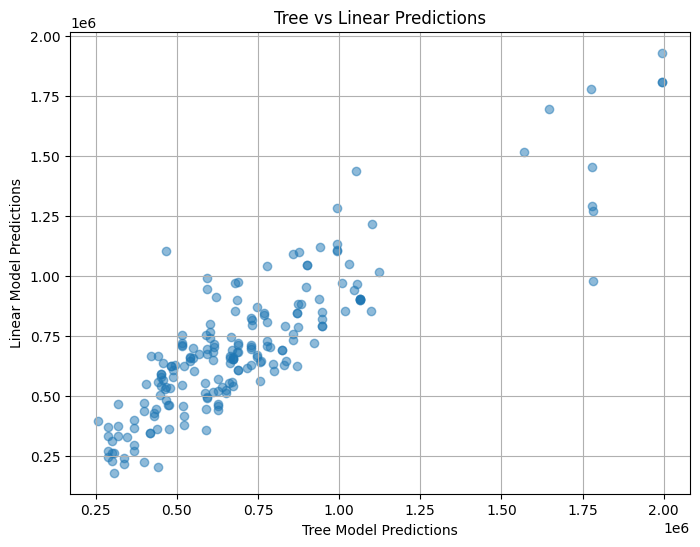

In [65]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_pred_lin, alpha=0.5)
plt.xlabel("Tree Model Predictions")
plt.ylabel("Linear Model Predictions")
plt.title("Tree vs Linear Predictions")
plt.grid(True)
plt.show()


6. The plot is mostly diagonal, so it seems like the two models gave similar predictions. The model seems less diagonal at the higher prices, so seems like there's more variation there. Maybe the tree predicts slightly more complex patterns, while the linear model stays.. well, linear, though the two are fairly aligned.

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

In [66]:
import pandas as pd
df = pd.read_csv('corporate_ratings.csv')
print("Shape of the dataset:", df.shape)
print(df.head())


Shape of the dataset: (2029, 31)
  Rating                   Name Symbol                  Rating Agency Name  \
0      A  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
1    BBB  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
2    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
3    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
4    BBB  Whirlpool Corporation    WHR  Standard & Poor's Ratings Services   

         Date             Sector  currentRatio  quickRatio  cashRatio  \
0  11/27/2015  Consumer Durables      0.945894    0.426395   0.099690   
1   2/13/2014  Consumer Durables      1.033559    0.498234   0.203120   
2    3/6/2015  Consumer Durables      0.963703    0.451505   0.122099   
3   6/15/2012  Consumer Durables      1.019851    0.510402   0.176116   
4  10/24/2016  Consumer Durables      0.957844    0.495432   0.141608   

   daysOfSalesOutstanding  ...  effectiveTaxRate  \
0      

1. 2029 rows, 31 columns

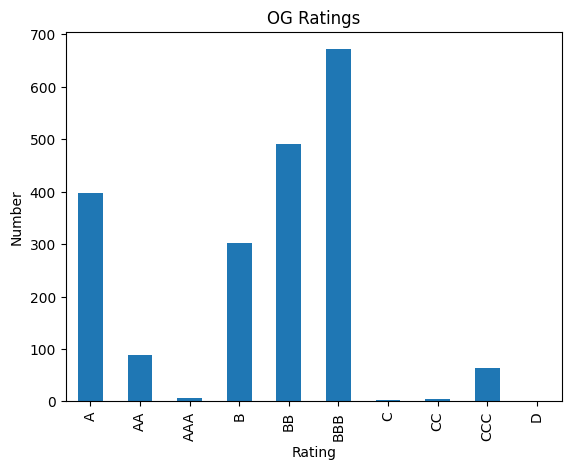

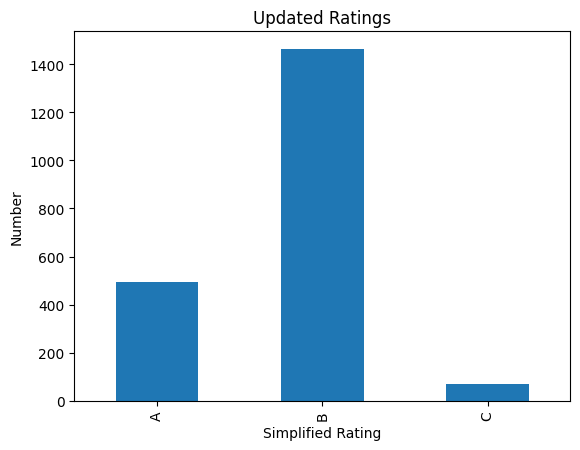

In [67]:
import matplotlib.pyplot as plt

df['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('OG Ratings')
plt.xlabel('Rating')
plt.ylabel('Number')
plt.show()

def simplify_rating(rating):
    if rating in ['AAA', 'AA', 'A']:
        return 'A'
    elif rating in [ 'BBB', 'BB', 'B']:
        return 'B'
    else:
        return 'C'

df['SimpleRating'] = df['Rating'].apply(simplify_rating)

df['SimpleRating'].value_counts().sort_index().plot(kind='bar')
plt.title('Updated Ratings')
plt.xlabel('Simplified Rating')
plt.ylabel('Number')
plt.show()


In [36]:
df_model = df.drop(columns=['Rating', 'Date', 'Name', 'Symbol', 'Rating Agency Name'])
df_model = pd.get_dummies(df_model, columns=['Sector'])

X = df_model.drop(columns=['SimpleRating'])
y = df_model['SimpleRating']


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred, labels=['A', 'B', 'C'])

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Confusion Matrix:")
print(conf_matrix)

print("Accuracy:", accuracy)



Accuracy: 0.7068965517241379
Confusion Matrix:
[[ 50  45   1]
 [ 46 236  12]
 [  0  15   1]]
Accuracy: 0.7068965517241379


4. The model had a 70.7% accuracy rating, so it predicted correctly about 7/10ths of the time on the test data.

In [38]:
df_model = df.drop(columns=['Rating', 'Date', 'Name', 'Symbol'])
df_model = pd.get_dummies(df_model, columns=['Sector', 'Rating Agency Name'])

X = df_model.drop(columns=['SimpleRating'])
y = df_model['SimpleRating']

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred, labels=['A', 'B', 'C'])

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Confusion Matrix:")
print(conf_matrix)

print("Accuracy:", accuracy)


Accuracy: 0.7463054187192119
Confusion Matrix:
[[ 64  32   0]
 [ 49 234  11]
 [  3   8   5]]
Accuracy: 0.7463054187192119


Yes, the accuracy goes up to 74.7%. Maybe each rating agency has a different standard for scoring, so adjusting for that increased the accuracy?